In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import operator

In [2]:
import_file = 'dataset/review.json'
review = pd.read_json(import_file, lines=True)

In [3]:
import_file = 'dataset/business.json'
business = pd.read_json(import_file, lines=True)

In [4]:
review

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA
2,uYHaNptLzDLoV_JZ_MuzUA,0,2015-09-17,0,ne5WhI1jUFOcRn-b-gAzHA,3,Mittlerweile gibt es in Edinburgh zwei Ableger...,0,AXgRULmWcME7J6Ix3I--ww
3,uYHaNptLzDLoV_JZ_MuzUA,0,2016-08-21,0,llmdwOgDReucVoWEry61Lw,4,Location is everything and this hotel has it! ...,0,oU2SSOmsp_A8JYI7Z2JJ5w
4,uYHaNptLzDLoV_JZ_MuzUA,0,2013-11-20,0,DuffS87NaSMDmIfluvT83g,5,gute lage im stadtzentrum. shoppingmeile und s...,0,0xtbPEna2Kei11vsU-U2Mw
5,uYHaNptLzDLoV_JZ_MuzUA,0,2016-06-05,0,GvLmUkjUrOyFH8KFnmT1uw,5,Erstklassige Lage. Dazu ist alles geschrieben ...,0,rW8q706dz5-NnXDzMwVkiw
6,uYHaNptLzDLoV_JZ_MuzUA,0,2015-02-21,0,lGEl24NGj2HVBJrodeXcjg,4,"Beautiful space, great location, staff rock. T...",0,yx8vNXUL0D0HS8rUIC7AFA
7,uYHaNptLzDLoV_JZ_MuzUA,0,2013-07-07,0,cUgvEy5wj7zYE68v1BzzVg,4,This is a fairly new property I think. It is a...,0,zXnH6W74FAJQ7q7b-NuBsA
8,uYHaNptLzDLoV_JZ_MuzUA,2,2013-04-27,0,FSB_BnvysBgH3JYrbFNcgw,4,First time at this group of hotels. Pretty new...,2,c5yp5hxwC1N98MjbV2LyWQ
9,uYHaNptLzDLoV_JZ_MuzUA,0,2015-04-13,0,dhl3ZW9aAEX_T7_um5tfaQ,4,Location location location! \n\nMotel One is j...,2,xJisL5w4wOgiYLokGMT_IA


In [5]:
def locations_by_user(user):
    businesses = []
    latitudes = []
    longitudes = []
    for i in range(len(review)):
        if review['user_id'][i]==user:
            businesses.append(review['business_id'][i])
    for j in range(len(business)):
        if business['business_id'][j] in businesses:
            latitudes.append(business['latitude'][j])
            longitudes.append(business['longitude'][j])
    return businesses, latitudes, longitudes

In [6]:
loc = locations_by_user('cQU8IWVEJYcklBJbW9CzdQ')

In [7]:
businesses = loc[0]
latitudes = loc[1]
longitudes = loc[2]

In [13]:
import gmplot
gmap = gmplot.GoogleMapPlotter(36, -150, 16)
gmap.scatter(latitudes, longitudes, 'cornflowerblue', edge_width=10)
gmap.draw("mymap.html")

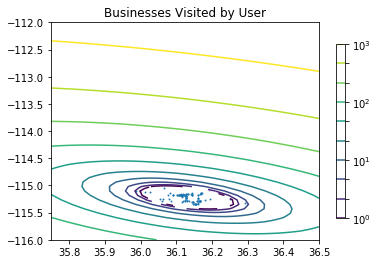

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

X_train = []
for i in range(len(latitudes)):
    X_train.append([latitudes[i],longitudes[i]])
X_train = np.array(X_train)

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=1, covariance_type='full')
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(35.75, 36.5)
y = np.linspace(-112, -116)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Businesses Visited by User')
plt.axis('tight')
plt.show()